In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

In [5]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [6]:
n_samples, n_features = X.shape

In [7]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
for epoch in range(100):
  y_pred = model(X)
  loss = criterion(y_pred, y)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4329.9717
epoch: 20, loss = 3231.9907
epoch: 30, loss = 2437.4546
epoch: 40, loss = 1861.8931
epoch: 50, loss = 1444.5480
epoch: 60, loss = 1141.6519
epoch: 70, loss = 921.6358
epoch: 80, loss = 761.6984
epoch: 90, loss = 645.3517
epoch: 100, loss = 560.6600


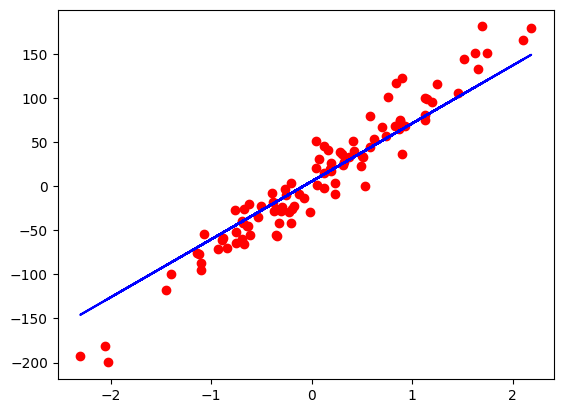

In [10]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()